# MỤC TIÊU

Thực hiện bài toán kiểm định 1 phía cho 2 tham số

- Kỳ vọng ($\mu$)
- Tỷ lệ (p)

# VÍ DỤ

## Ví dụ 1

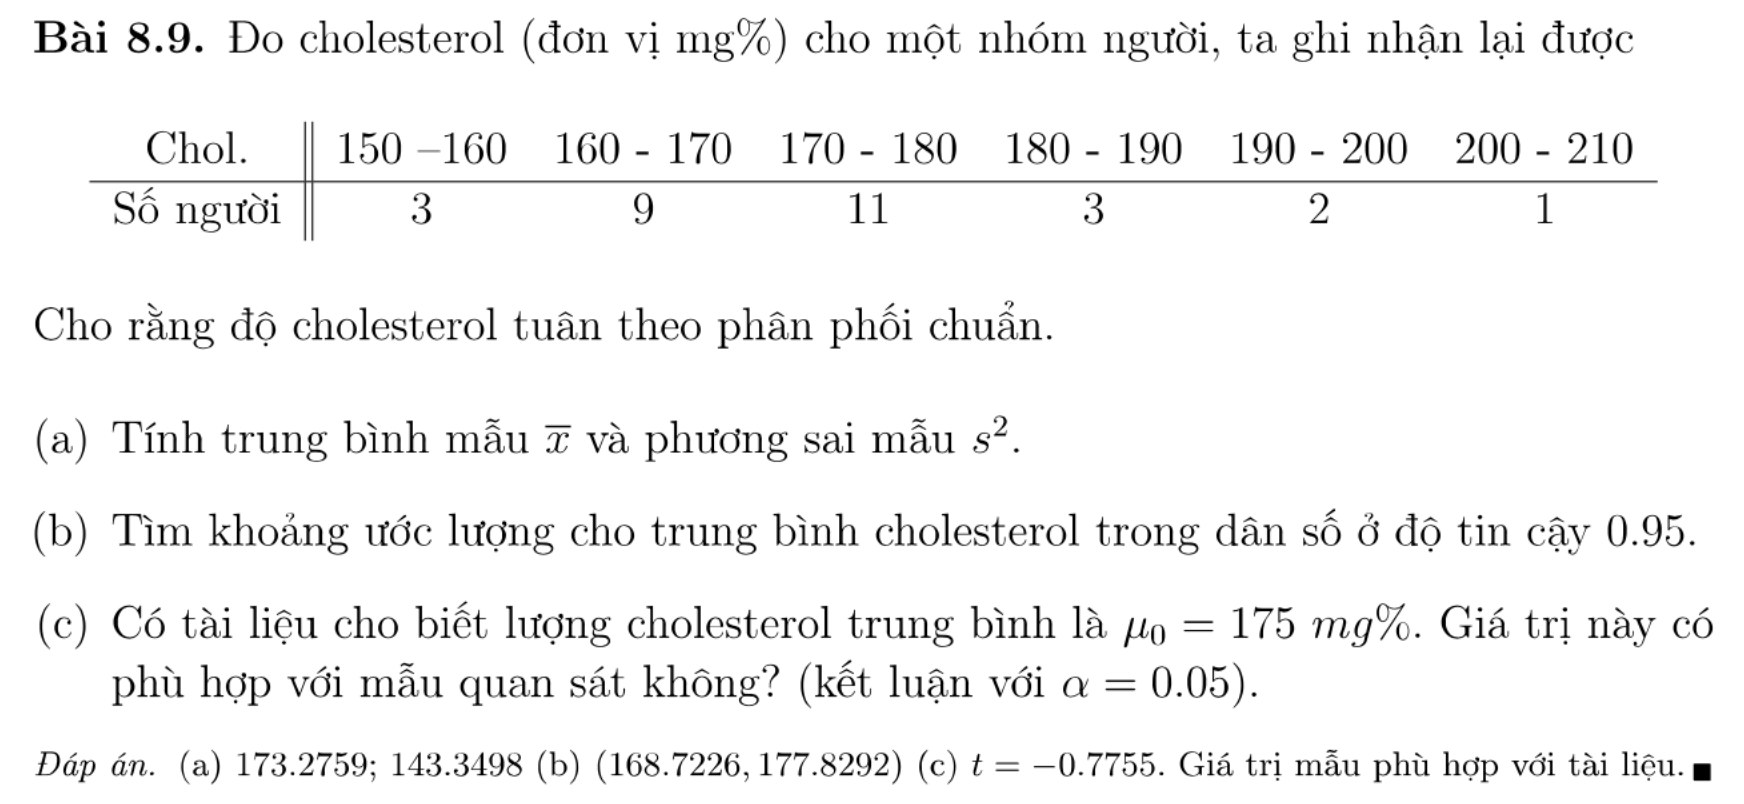

In [3]:
import numpy as np
import scipy.stats as st

In [11]:
freq_table = [(155, 3), (165, 9), (175, 11), (185, 3), (195, 2), (205, 1)]
# freq_table = [(155, 3), (165, 2), (175, 1)]

In [13]:
data = []
for v, f in freq_table:
    for i in range(f):
        data.append(v)

# data

In [28]:
# Tinh toan cac so lieu thong ke tren mau

# Kich thuoc mau
n = len(data)

# Tinh trung binh mau
tb = round(np.mean(data), 4)

# Tinh do lech chuan mau
dlc = round(np.std(data, ddof=1), 4)

print('Kich thuoc mau: ', n)
print('Trung binh mau: ', tb)
print('Do lech chuan mau: ', dlc)

Kich thuoc mau:  29
Trung binh mau:  173.2759
Do lech chuan mau:  11.9729


In [22]:
import math

In [29]:
# Cau b: Tim khoang uoc luong cho ky vong o do tin cay 95%

st.t.interval(0.95, df=n-1, loc=tb, scale=(dlc/math.sqrt(n)))

(168.72165240566306, 177.83014759433695)

In [26]:
# Cau b (tinh tay)

# Vì ta không biết giá trị của sigma (độ lệch chuẩn quần thể), 
# vì vậy, trung bình mẫu tuân theo phân phối Student
# Ta có: sai số ước lượng:
epsilon = st.t.isf(0.025, df=n-1) * (dlc / math.sqrt(n))

epsilon

4.554238369648043

In [30]:
# Khoảng ước lượng:
print('Khoảng ước lượng: ({0}, {1})'.format(tb-epsilon, tb+epsilon))

Khoảng ước lượng: (168.72166163035197, 177.83013836964804)


__Câu c: Kiểm định__

Phát biểu: "Lượng cholesterol trung bình là 175mg%".

B1: Đặt cập giả thuyết, đối thuyết

Ho = $\mu = 175$

Ha = $\mu <> 175$

Giả định Ho đúng, tìm bằng chứng để thử bác bỏ Ho

B2: Mức ý nghĩa của kiểm định: $\alpha$ = 0.05

B4: Xác định miền bác bỏ giả thuyết:        

In [32]:
t_alpha_chia_2 = st.t.isf(0.025, df=n-1)
t_alpha_chia_2

2.048407141795244

Vậy miền bác bỏ của giả thuyết là: {t: |t| > 2.0484}}

In [33]:
# B3: Tính trị kiểm định:
        
t = (tb - 175) / (dlc / math.sqrt(n))
t

-0.7754648116981316

B5: Kết luận

t không thuộc miền bác bỏ.

Vậy chấp nhận giả thuyết Ho ban đầu

## Ví dụ 2

# BÀI TẬP

## Kiểm định đặc trưng tỉ lệ (p)

### Bài 1

Dataset 18 (__M&M__) chứa thông tin trọng lượng và màu sắc của mẫu các viên kẹo của hãng M&M. 

Sử dụng mẫu trên bạn hãy kiểm tra phát biểu sau: __"20% kẹo M&M có màu đỏ"__ với mức ý nghĩa là 5%

### Bài 2

Dataset 3 (__FRESH15__) chứa thông tin khảo sát những thay đổi về trọng lượng (weight - WT) và chỉ số khối của cơ thể (BMI) của sinh viên năm nhất tại một trường Đại Học. Thời điểm khảo sát là bắt đầu học kỳ (tháng 9 - SEP) và kết thúc học kỳ (tháng 4 - APR), các sinh viên được chọn ngẫu nhiên trong trường.

Sử dụng mẫu trên, hãy kiểm tra phát biểu:__"50% số sinh viên trong trường là nam"__ với mức ý nghĩa 50%

### Bài 3

Dataset 6(__BEARS__) chứa thông tin khảo sát ngẫu nhiên các con gấu trong một khu rừng.

Sử dụng mẫu trên, bạn hãy kiểm tra phát biểu: __"tỷ lệ gấu đực trong khu rừng là 50%""__ với mức ý nghĩa 90%.

Biết rằng thuộc tính SEX có hai giá trị: 1 - gấu đực, 2- gấu cái.

### Bài 4

Dataset 9 __(MOVIES)__ chứa thông tin khảo sát một số phim trong khoảng thời gian 33 năm gần đây.

Có ý kiến cho rằng: __"55% các phim trong khoảng thời gian 33 năm gần đây có nhãn R (là phim giới hạn độ tuổi - Restricted)"__ .Theo bạn với mức ý nghĩa 95% ý kiến trên có đúng không?

Tham khảo: [Hệ thống phân loại của hiệp hội điện ảnh Mỹ](https://vi.wikipedia.org/wiki/H%E1%BB%87_th%E1%BB%91ng_ph%C3%A2n_lo%E1%BA%A1i_phim_c%E1%BB%A7a_MPAA#Ph%C3%A2n_lo%E1%BA%A1i_v%E1%BB%9Bi_c%C3%A1c_trailer_phim)

## Kiểm định đặc trưng kỳ vọng ($\mu$) biết ($\sigma$)

### Bài 5

Dataset 19(__SCREWS__) chứa thông tin khảo sát chiều dài một số đinh ốc được cung cấp bởi công ty Crown Bolt (đơn vị inches)

Trên bao bì của các đinh ốc do công ty sản xuất có ghi chiều dài của các đinh ốc là 3/4 inches. Sử dụng mẫu trên bạn hãy cho biết chiều dài của đinh ốc lấy từ mẫu thu nhận được từ dữ liệu trên có nhất quán với chiều dài ghi trên bao bì hay không? Kiểm định với mức ý nghĩa 5%

_Biết rằng, theo tài liệu kỹ thuật của công ty thì độ lệch chuẩn về chiều dài các con vít là 0.012 inches_

### Bài 6

Dataset 13 __(VOLTAGE)__ liệt kê các mức điện áp được đo tại các hộ gia đình bởi các máy đo khác nhau: tại nhà (HOME), tại máy phát độc lập (Generator), tại trạm phát (UPS).

Công ty cung cấp điện cho vùng này cam kết rằng: __"Mục tiêu cung cấp điện cho mỗi hộ gia đình là 120V"__ . Biết rằng độ lệch chuẩn của tất cả các mức điện áp đo được là 0.24V.

Với mức ý nghĩa 1%. Bạn hãy kiểm tra xem công ty có làm đúng cam kết hay không?

## Kiểm định đặc trưng kỳ vọng ($\mu$) không biết ($\sigma$)

### Bài 7

Dataset 19(__SCREWS__) chứa thông tin khảo sát chiều dài một số đinh ốc được cung cấp bởi công ty Crown Bolt (đơn vị inches)

Trên bao bì của các đinh ốc do công ty sản xuất có ghi chiều dài của các đinh ốc là 3/4 inches. Sử dụng mẫu trên bạn hãy cho biết chiều dài của đinh ốc lấy từ mẫu thu nhận được từ dữ liệu trên có nhất quán với chiều dài ghi trên bao bì hay không? Kiểm định với mức ý nghĩa 5%

### Bài 8

Dataset 13 __(VOLTAGE)__ liệt kê các mức điện áp được đo tại các hộ gia đình bởi các máy đo khác nhau: tại nhà (HOME), tại máy phát độc lập (Generator), tại trạm phát (UPS).

Công ty cung cấp điện cho vùng này cam kết rằng: __"Mục tiêu cung cấp điện cho mỗi hộ gia đình là 120V"__ .

Với mức ý nghĩa 1%. Bạn hãy kiểm tra xem công ty có làm đúng cam kết hay không?

### Bài 9

Dataset 2 __(BODYTEMP)__ chứa thông tin khảo sát nhiệt độ cơ thể từ một nhóm người vào cùng một thời điểm lúc 12h trưa.

Có một phát biểu nói rằng, nhiệt độ cơ thể người đo lúc 12h trưa trong quần thể này là 98,6°

Dựa vào mẫu trên, bạn hãy cho biết phát biểu trên đúng hay sai ở mức ý nghĩa là 5%.

### Bài 10

__FICO Score__ là đại lượng dùng để đo khả năng tín dụng của một cá nhân hoặc một tập thể. Sử dụng FICO Score, ngân hàng có thể quyết định xem có nên cho khách hàng mượn tiền hay không?

Dataset 24 __(FICO)__ chứa thông tin điểm tín dụng (FICO Score) của một số cá nhân trong vùng.

Sử dụng dữ liệu mẫu từ, bạn hãy cho biết ý kiến: __"điểm tín dùng trung bình của quần thể là 678"__ là đúng hay sai với mức ý nghĩa 5%

---